# LEBRON VS JORDAN PREDICTION



### Introducción
El objetivo de este proyecto es trabajar con la base de datos sobre las estadísticas de la carrera de Lebron y Jordan de la NBA.

- Los puntos son los siguientes:
    * Análisis de los atributos
    * Aplicar diversos modelos de predicción
    * Visualizaciones y presentación de resultados
    * Conclusiones

Los datos dichos anteriormente tratan sobre las estadísticas sobre estos jugadores. El objetivo en sí, se trata sobre predecir si con las diferentes estadísticas podemos predecir a qué jugador estamos hablando.

Esta base de datos es creado posteriormente, antes de esto los datos que tenemos están en datasets diferentes, una base de datos sobre Lebron y otra sobre Jordan. Pero en cada dataset tienen los mismos campos, eso hace que podamos juntar estas dos bases de datos.

- Hay un total de 26 atributos, que son los siguientes:
    * date: fecha del partido
    * age: edad
    * team: equipo
    * opp: oponente
    * result: W:Ganado, L:Perdido
    * mp: minutos jugado por partido
    * fg: canasta por partido
    * fga: canasta intentados por partido
    * fgp: porcentaje de canasta
    * three: tiros de 3 puntos por partido
    * threeatt: 3 puntos de tiros intentados por partido
    * threep: porcentaje de tiros de 3 puntos por partido
    * ft: tiros libres por partido
    * fta: tiros libres intentados por partido
    * ftp: porcentaje de tiros libres por partido
    * orb: rebotes ofensivos por partido
    * drb: rebotes defensivos por partido
    * trb: rebotes totales por partido
    * ast: asistencias por partido
    * stl: robos por partido
    * blk: tapones por partido
    * tov: pérdidas de balón por partido
    * pts: puntos por partido

#### CARGAR LOS DATASETS



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn import svm, datasets
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_recall_curve, average_precision_score, roc_curve, auc, recall_score, precision_score
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing


import warnings
warnings.filterwarnings('ignore')
    
# import some data to play with
def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',')
    return dataset

jordan_dataset = load_dataset('../data/jordan_career.csv')
lebron_dataset = load_dataset('../data/lebron_career.csv')

### ANÁLISIS DE LOS DATOS


En este apartado se van a analizar los datos que tenemos sobre los dos datasets, para comprobar si hay valores innecesarios o valores null, nan o etc. También se comprobará qué tipos de atributos son cada uno.

In [2]:
def check_dataframe(dataframe):
    print('############### HEAD ###############')
    print(dataframe.head(5))
    print('############### NaN ###############')
    print(dataframe.isnull().sum())
    print('############### INFO ###############')
    print(dataframe.info())

#### ANÁLISIS SOBRE LA BASE DE DATOS DE JORDAN
- Valores Nan:
    - Threep : 330
    - ftp: 30
    - minus_plus: 1072
- Tipos de atributos:
    - Float: 5
    - Int: 15
    - Object: 6
- Valores null: 0
- Total de partidos: 1072

Comprobamos con este análisis que nuestra base de datos, tenemos el atributo minus_plus que obtiene el valor NaN, entonces se eliminará este atributo, ya que es innecesario. También comprobamos que los otros atributos que son ftp o threep tienen valor NaN, puesto que son el porcentaje, y en vez de NaN también puede obtener el valor 0, se ha decidido en modificar el valor NaN a 0.

In [3]:
check_dataframe(jordan_dataset)

############### HEAD ###############
   game        date     age team  opp   result     mp  fg  fga    fgp  ...  \
0     1  1984-10-26  21-252  CHI  WSB  W (+16)  40:00   5   16  0.313  ...   
1     2  1984-10-27  21-253  CHI  MIL   L (-2)  34:00   8   13  0.615  ...   
2     3  1984-10-29  21-255  CHI  MIL   W (+6)  34:00  13   24  0.542  ...   
3     4  1984-10-30  21-256  CHI  KCK   W (+5)  36:00   8   21  0.381  ...   
4     5  1984-11-01  21-258  CHI  DEN  L (-16)  33:00   7   15  0.467  ...   

   orb  drb  trb  ast  stl  blk  tov  pts  game_score  minus_plus  
0    1    5    6    7    2    4    5   16        12.5         NaN  
1    3    2    5    5    2    1    3   21        19.4         NaN  
2    2    2    4    5    6    2    3   37        32.9         NaN  
3    2    2    4    5    3    1    6   25        14.7         NaN  
4    3    2    5    5    1    1    2   17        13.2         NaN  

[5 rows x 26 columns]
############### NaN ###############
game             0
date    

#### ANÁLISIS SOBRE LA BASE DE DATOS DE LEBRON
- Valores Nan:
    - Threep : 40
    - ftp: 12
    - minus_plus: 1072
- Tipos de atributos:
    - Float: 5
    - Int: 15
    - Object: 6
- Valores null: 0
- Total de partidos: 1072

Para esta base de datos obtenemos los mismos resultados que en la anterior base de datos, lo cual se harán las mismas modificaciones en los dos casos.

In [4]:
check_dataframe(lebron_dataset)

############### HEAD ###############
   game        date     age team  opp   result     mp  fg  fga    fgp  ...  \
0     1  2003-10-29  18-303  CLE  SAC  L (-14)  42:00  12   20  0.600  ...   
1     2  2003-10-30  18-304  CLE  PHO   L (-9)  41:00   8   17  0.471  ...   
2     3  2003-11-01  18-306  CLE  POR  L (-19)  39:00   3   12  0.250  ...   
3     4  2003-11-05  18-310  CLE  DEN   L (-4)  41:00   3   11  0.273  ...   
4     5  2003-11-07  18-312  CLE  IND   L (-1)  44:00   8   18  0.444  ...   

   orb  drb  trb  ast  stl  blk  tov  pts  game_score  minus_plus  
0    2    4    6    9    4    0    2   25        24.7          -9  
1    2   10   12    8    1    0    7   21        14.7          -3  
2    0    4    4    6    2    0    2    8         5.0         -21  
3    2    9   11    7    2    3    2    7        11.2          -3  
4    0    5    5    3    0    0    7   23         9.0          -7  

[5 rows x 26 columns]
############### NaN ###############
game           0
date      

Primero de todo, para cada base de datos se añadirá una nueva columna que será nombrada como 'player'. Esto nos servirá más adelante para poder predecir este campo respeto a sus estadísticas. Para ello se ha decidido que el jugador Jordan tenga el valor 0, y el jugador Lebron tendrá el valor 1.

También se creará una nueva base de datos, el cual trabajaremos con ella. Esta base de datos serán los datos sobre Lebron y Jordan unidas.

In [5]:
jordan_dataset['player'] = 0 #JORDAN 
lebron_dataset['player'] = 1 #LEBRON
lebron_jordan = jordan_dataset.append(lebron_dataset, ignore_index=True)

In [6]:
check_dataframe(lebron_jordan)

############### HEAD ###############
   game        date     age team  opp   result     mp  fg  fga    fgp  ...  \
0     1  1984-10-26  21-252  CHI  WSB  W (+16)  40:00   5   16  0.313  ...   
1     2  1984-10-27  21-253  CHI  MIL   L (-2)  34:00   8   13  0.615  ...   
2     3  1984-10-29  21-255  CHI  MIL   W (+6)  34:00  13   24  0.542  ...   
3     4  1984-10-30  21-256  CHI  KCK   W (+5)  36:00   8   21  0.381  ...   
4     5  1984-11-01  21-258  CHI  DEN  L (-16)  33:00   7   15  0.467  ...   

   drb  trb  ast  stl  blk  tov  pts  game_score  minus_plus  player  
0    5    6    7    2    4    5   16        12.5         NaN       0  
1    2    5    5    2    1    3   21        19.4         NaN       0  
2    2    4    5    6    2    3   37        32.9         NaN       0  
3    2    4    5    3    1    6   25        14.7         NaN       0  
4    2    5    5    1    1    2   17        13.2         NaN       0  

[5 rows x 27 columns]
############### NaN ###############
game     

#### TRATAR LOS DATOS

En este apartado vamos a tratar los datos y comprobar que nuestros datos están limpios

Comprobamos que nuestra base de datos hay valores null, entonces lo que haremos será modificar 

In [7]:
lebron_jordan.isnull().values.any()

True

 Comprobamos que nuestra base de datos no tienen ningún valor duplicado

In [8]:
lebron_jordan[lebron_jordan.duplicated()]

,game,date,age,team,opp,result,mp,fg,fga,fgp,...,drb,trb,ast,stl,blk,tov,pts,game_score,minus_plus,player


Borramos el campo minus_plus, ya que es innecesario, y también la fecha en sí, porque nos resulta interesante. También modificaremos todos los valores nan que hay en nuestra base de datos para que obtenga el valor 0.

In [9]:
lebron_jordan = lebron_jordan.drop(['minus_plus'], axis=1)
lebron_jordan = lebron_jordan.drop(['date'], axis=1)
lebron_jordan['threep'].fillna(0.0, inplace=True)
lebron_jordan['ftp'].fillna(0.0, inplace=True)


Ahora vamos a tratar los atributos de tipo object. Los atributos a tratar son el 'result', 'mp' y 'age'. 

In [10]:
lebron_jordan['result'] = lebron_jordan['result'].str[:1]
lebron_jordan["mp"] = lebron_jordan["mp"].apply(lambda x: float(str(x).replace(":",".").split(",")[0].strip()))
lebron_jordan["age"] = lebron_jordan["age"].apply(lambda x: float(str(x).replace("-",".").split(",")[0].strip()))

Comprovem després de modificar tots els atributs rebundants, no hi ha cap atribut que sigui null

In [11]:
lebron_jordan.isnull().values.any()

False

In [12]:
lebron_jordan.head()

,game,age,team,opp,result,mp,fg,fga,fgp,three,...,orb,drb,trb,ast,stl,blk,tov,pts,game_score,player
0,1,21.252,CHI,WSB,W,40.0,5,16,0.313,0,...,1,5,6,7,2,4,5,16,12.5,0
1,2,21.253,CHI,MIL,L,34.0,8,13,0.615,0,...,3,2,5,5,2,1,3,21,19.4,0
2,3,21.255,CHI,MIL,W,34.0,13,24,0.542,0,...,2,2,4,5,6,2,3,37,32.9,0
3,4,21.256,CHI,KCK,W,36.0,8,21,0.381,0,...,2,2,4,5,3,1,6,25,14.7,0
4,5,21.258,CHI,DEN,L,33.0,7,15,0.467,0,...,3,2,5,5,1,1,2,17,13.2,0


Mostramos gráficamente el histograma sobre los puntos, el score del partido y los minutos por partido de los dos jugadores. Comprobamos que estos atributos serán necesario normalizar, ya que tienen una distribución normal. Se ha comprobado estos atributos, ya que son los que mas diferencia hay entre los otros atributos.

<AxesSubplot: xlabel='three', ylabel='Count'>

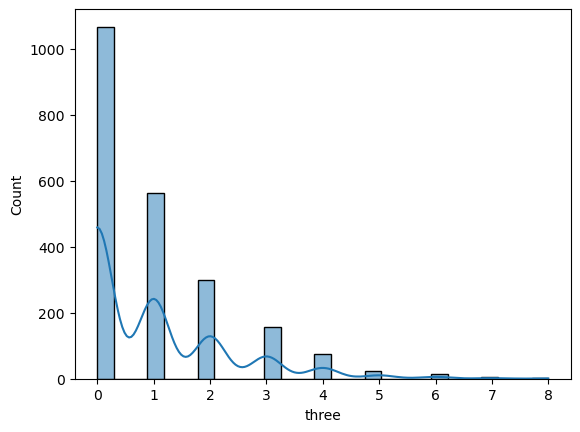

In [59]:
sns.histplot(data=lebron_jordan, x="three", kde=True)


<AxesSubplot: xlabel='pts', ylabel='Count'>

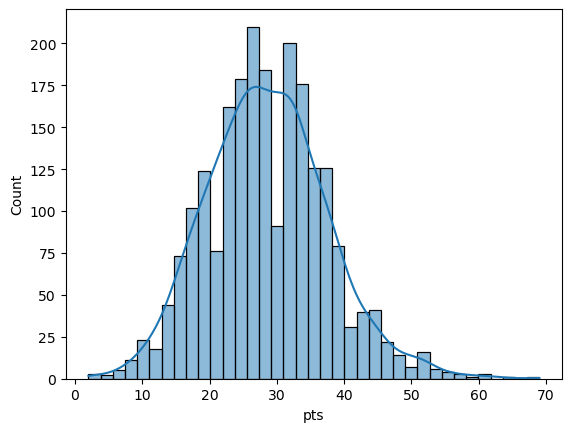

In [54]:
sns.histplot(data=lebron_jordan, x="pts", kde=True)


<AxesSubplot: xlabel='game_score', ylabel='Count'>

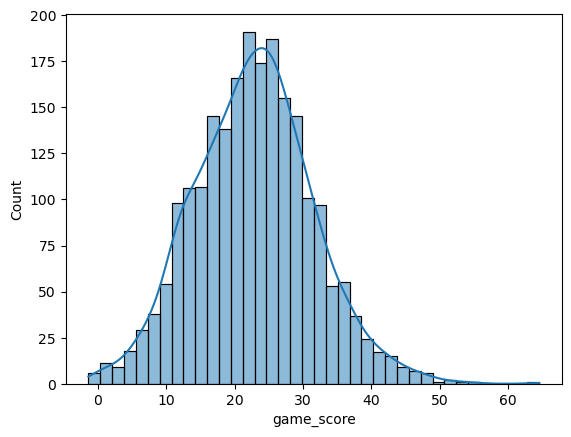

In [57]:
sns.histplot(data=lebron_jordan, x="game_score", kde=True)

<AxesSubplot: xlabel='mp', ylabel='Count'>

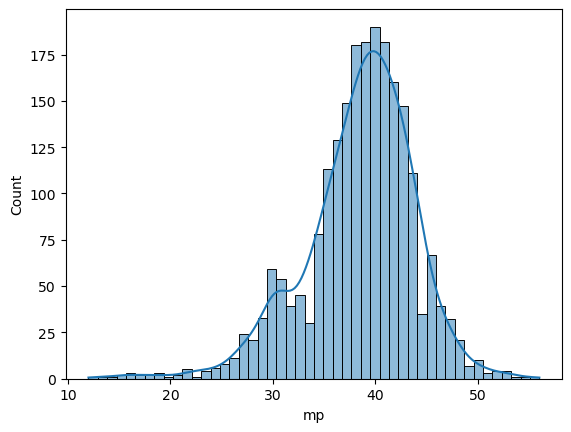

In [58]:
sns.histplot(data=lebron_jordan, x="mp", kde=True)

Mostramos gráficamente la cantidad sobre cada jugador para poder ver la diferencia que existen entre ellas visualmente.

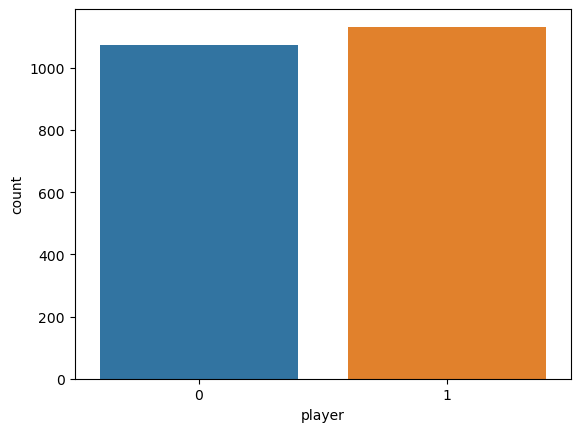

In [13]:
c_plot = sns.countplot(x=lebron_jordan["player"])
figure = c_plot.get_figure()    
figure.savefig('../figures/count_player.png', dpi=400)

Mostramos un gráfico sobre cada jugador y los puntos que le ha hecho a cada oponente dependiendo del equipo que haya estado.

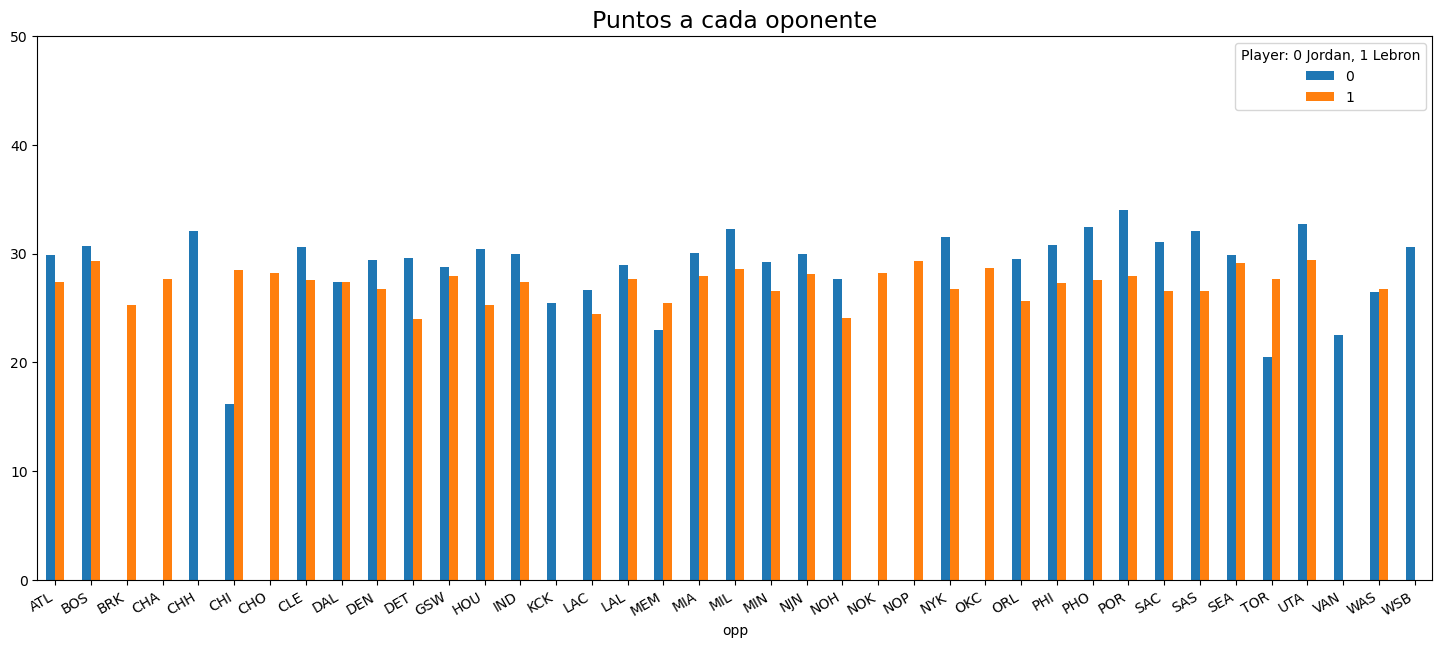

In [14]:
def plotPointsDependsOpp(dataframe):
    fig, ax = plt.subplots(figsize=(18,8))

    opp = dataframe.pivot_table(columns='player',index='opp', values='pts')
    opp.plot(ax=ax, kind='bar')

    ax.set_ylim(0, 50)
    ax.set_title("Puntos a cada oponente", fontsize=17)
    ax.legend(loc='upper right', title='Player: 0 Jordan, 1 Lebron')
    
    fig.autofmt_xdate()

plotPointsDependsOpp(lebron_jordan)

Verificamos que nuestros datos están modificados, y que no tienen valores innecesarios, y valores NaN.

In [15]:
lebron_jordan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2204 entries, 0 to 2203
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   game        2204 non-null   int64  
 1   age         2204 non-null   float64
 2   team        2204 non-null   object 
 3   opp         2204 non-null   object 
 4   result      2204 non-null   object 
 5   mp          2204 non-null   float64
 6   fg          2204 non-null   int64  
 7   fga         2204 non-null   int64  
 8   fgp         2204 non-null   float64
 9   three       2204 non-null   int64  
 10  threeatt    2204 non-null   int64  
 11  threep      2204 non-null   float64
 12  ft          2204 non-null   int64  
 13  fta         2204 non-null   int64  
 14  ftp         2204 non-null   float64
 15  orb         2204 non-null   int64  
 16  drb         2204 non-null   int64  
 17  trb         2204 non-null   int64  
 18  ast         2204 non-null   int64  
 19  stl         2204 non-null  

#### CATEGORIZAR


En este apartado vamos a categorizar utilizando LabelEncoder sobre nuestros atributos object, que son Team y Opp. Nos ha parecido interesante hacer LabelEncoder, ya que tenemos pocos valores únicos y los podemos diferenciar.

In [16]:
print("####### TEAMS ############")
print(lebron_jordan['team'].unique())
print("######## OPP ############")
print(lebron_jordan['opp'].unique())

####### TEAMS ############
['CHI' 'WAS' 'CLE' 'MIA']
######## OPP ############
['WSB' 'MIL' 'KCK' 'DEN' 'DET' 'NYK' 'IND' 'SAS' 'BOS' 'PHI' 'SEA' 'POR'
 'GSW' 'PHO' 'LAC' 'LAL' 'NJN' 'DAL' 'HOU' 'ATL' 'CLE' 'UTA' 'SAC' 'MIA'
 'CHH' 'MIN' 'ORL' 'TOR' 'VAN' 'WAS' 'MEM' 'CHI' 'NOH' 'CHA' 'NOK' 'OKC'
 'BRK' 'NOP' 'CHO']


In [17]:
def replace_categorical(df):
    le = preprocessing.LabelEncoder()
    columns = df.columns
    for col in columns:
        if df[col].dtype == 'object':
            le.fit(df[col].astype(str))
            df[col] = le.transform(df[col].astype(str))
    return df

In [18]:
lebron_jordan = replace_categorical(lebron_jordan)

In [19]:
lebron_jordan.head()

,game,age,team,opp,result,mp,fg,fga,fgp,three,...,orb,drb,trb,ast,stl,blk,tov,pts,game_score,player
0,1,21.252,0,38,1,40.0,5,16,0.313,0,...,1,5,6,7,2,4,5,16,12.5,0
1,2,21.253,0,19,0,34.0,8,13,0.615,0,...,3,2,5,5,2,1,3,21,19.4,0
2,3,21.255,0,19,1,34.0,13,24,0.542,0,...,2,2,4,5,6,2,3,37,32.9,0
3,4,21.256,0,14,1,36.0,8,21,0.381,0,...,2,2,4,5,3,1,6,25,14.7,0
4,5,21.258,0,9,0,33.0,7,15,0.467,0,...,3,2,5,5,1,1,2,17,13.2,0


Lo primero que haremos es generar el diagrama de correlación entre los atributos para ver cuales tienen mejor relación con el atributo objetivo.

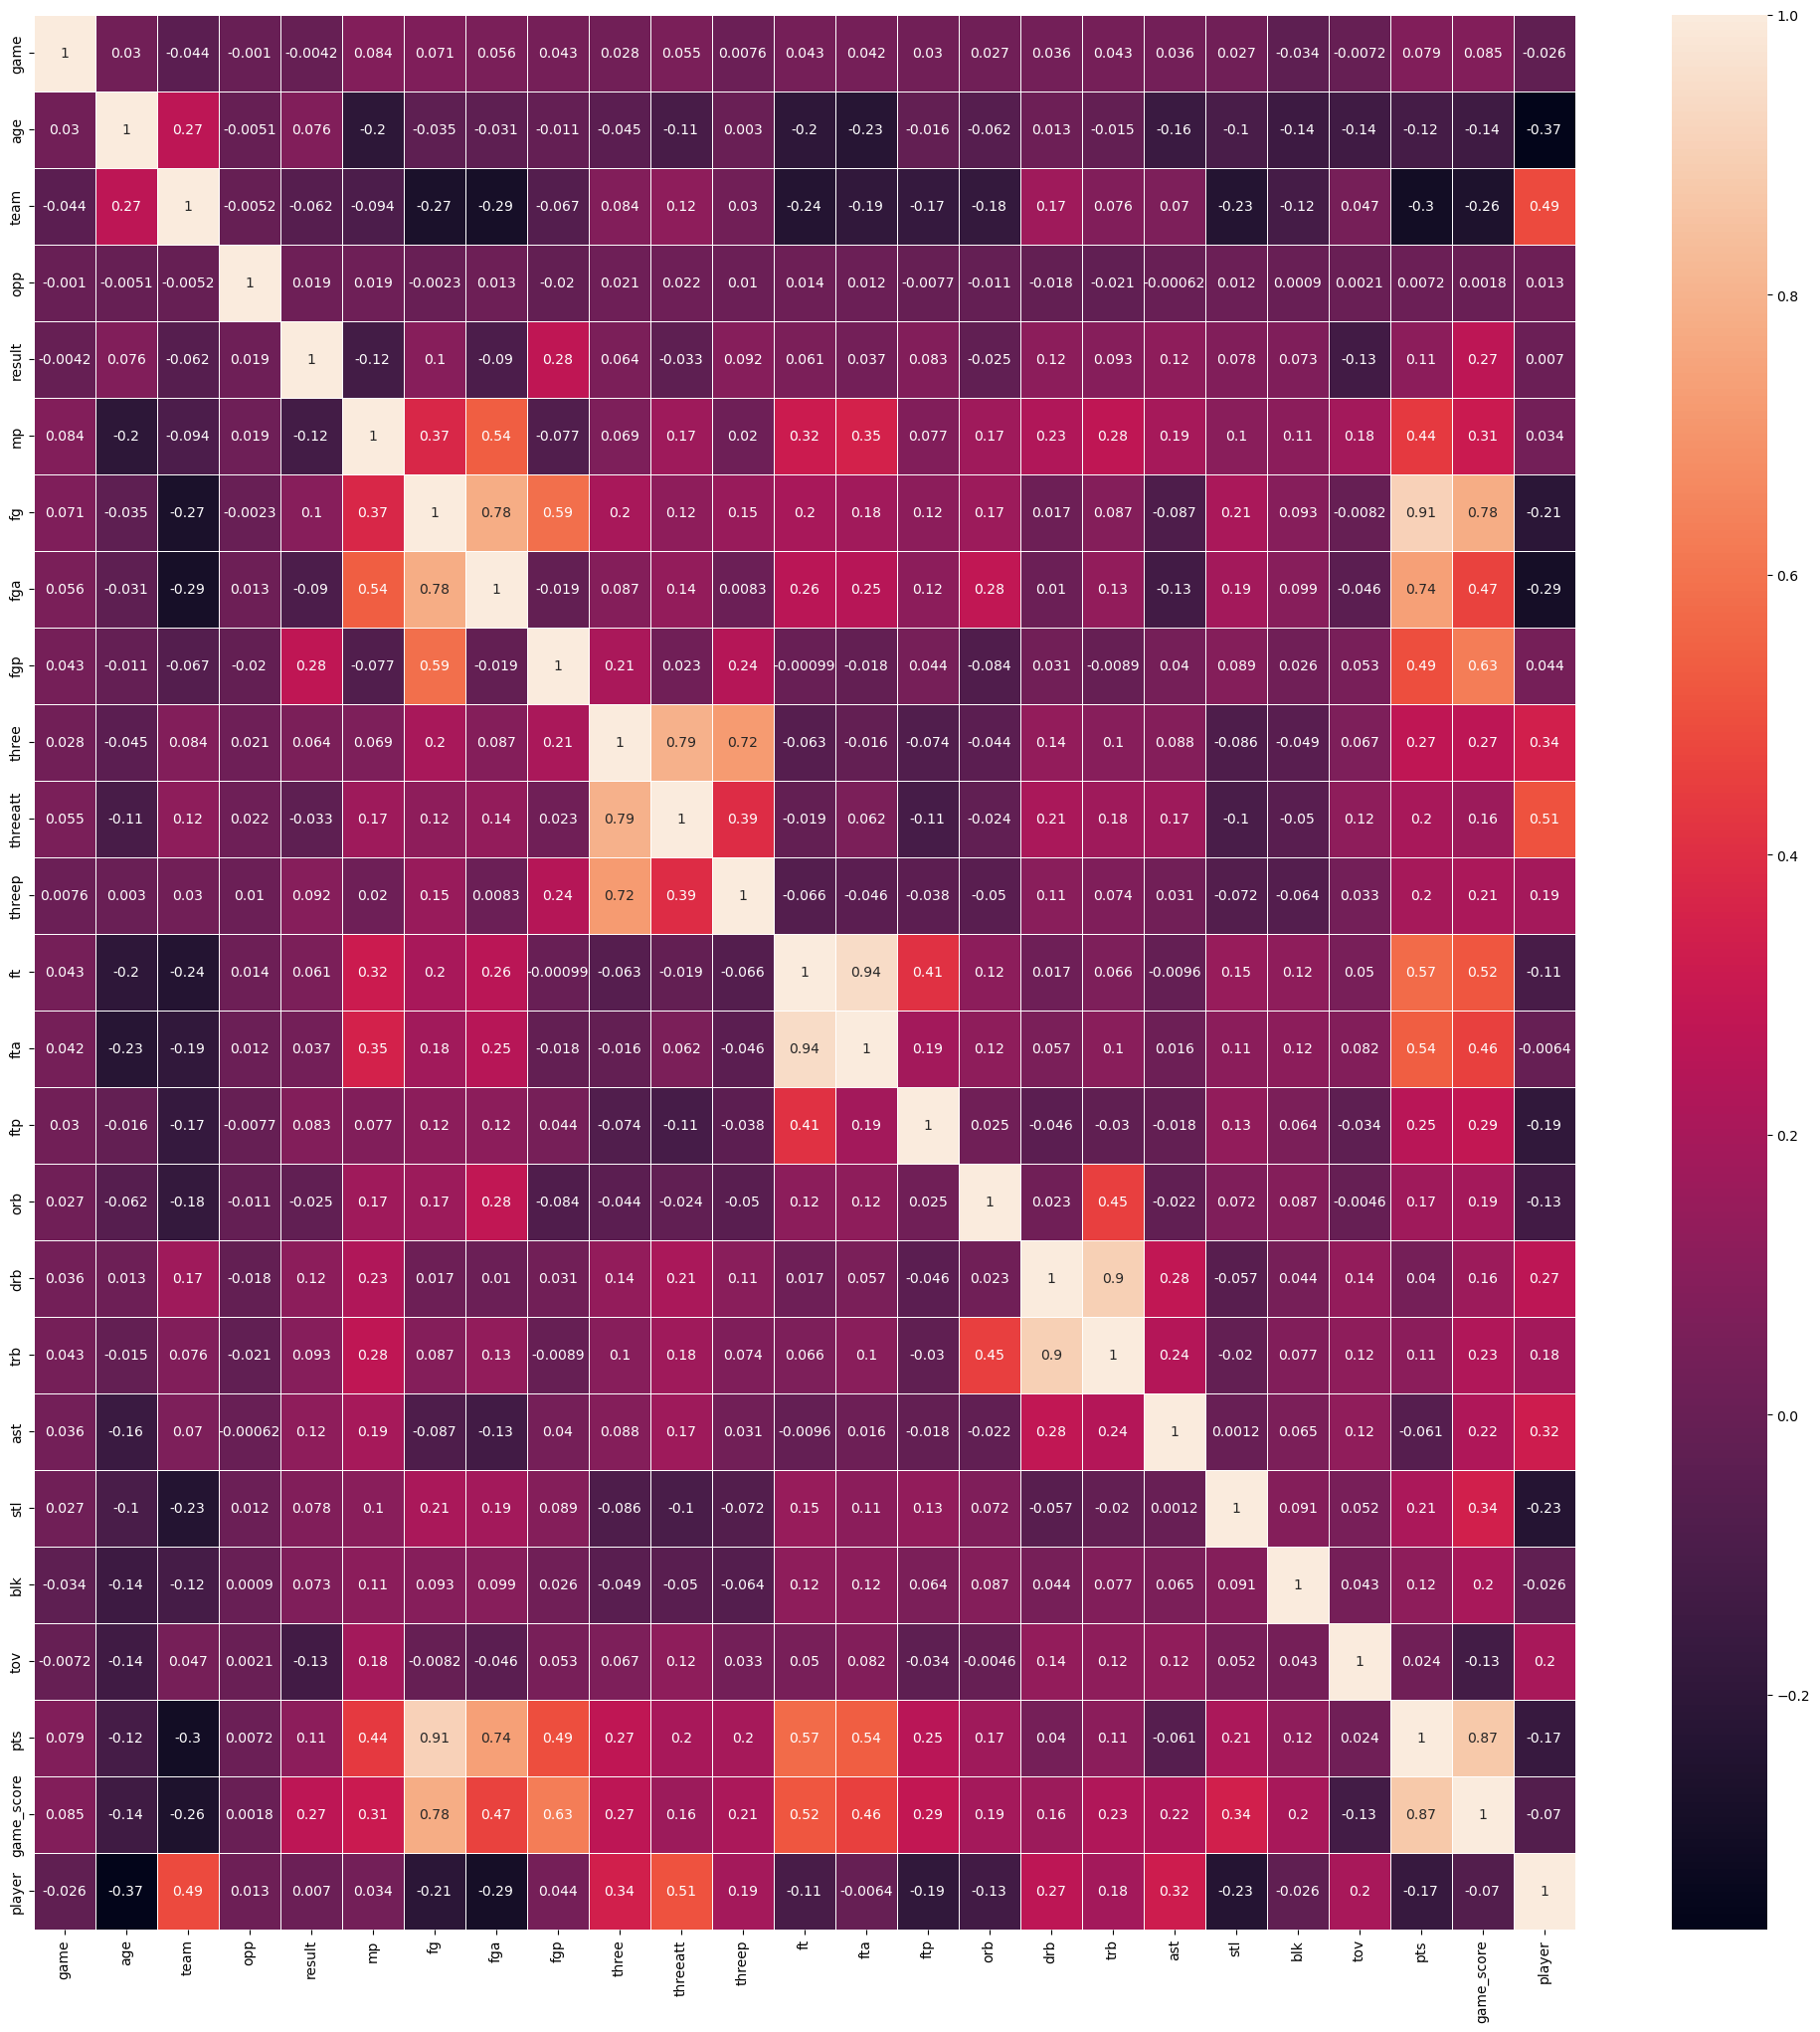

In [20]:
correlacio = lebron_jordan.corr()
plt.figure(figsize=(25,25))
ax = sns.heatmap(correlacio, annot=True, linewidths=.5)
figure = ax.get_figure()    
figure.savefig('../figures/correlacion.png', dpi=400)

#### PREPROCESAMIENTO DE DATOS

Después de realizar la exploración de los datos para conocer nuestro dataset. Para nuestro caso, los datos que utilizaremos como X, serán esa correlación que sean iguales o superiores a 0.20 a nuestro atributo objetivo, esto nos servirá para predecir nuestro atributo objetivo.

In [21]:
features = ['team', 'three', 'threeatt', 'drb', 'ast','tov']
X = lebron_jordan.loc[:, features].values
y = lebron_jordan.loc[:, 'player'].values

Antes de todo, se ha creado tres funciones para tenerlo más a mano. Una de ella es la creación de la matriz de confusión. En la otra función se evaluará el modelo por defecto, para saber si nuestro modelo sin hiperparámetros es más eficiente y predice mejor. Y la última función es sobre la evaluación sobre cada modelo utilizando un buscador sobre los mejores parámetros para nuestro dataset.

In [22]:
import time
# Matriz de confusión, y mostrarla por pantalla.
def create_confusionMatrix(true_class, preds, model_name):
    conf_matrix = confusion_matrix(y_true=true_class, y_pred=preds)
    labels = ['Class 0', 'Class 1']
    fig = plt.figure()
    model_filename = model_name.replace(' ', '_')
    sns.heatmap(conf_matrix, xticklabels=labels, yticklabels=labels, annot=True, fmt="d");
    plt.title('{} Confusion Matrix'.format(model_name))
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.savefig("../figures/{}_confusion_matrix.png".format(model_filename))
    plt.show() 
    
#Evaluar cada modelo y mostrar las métricas.
def evaluateModel(name, model, X_train, X_test, y_train, y_test):
    initialTime = time.time()
    model.fit(X_train, y_train)
    finalTime = time.time()* initialTime
    y_pred = model.predict(X_test)
    
    print("MODEL ", name )
    print('Accuracy: ', accuracy_score(y_test, y_pred))
    print("Recall: ", recall_score(y_test, y_pred, average='macro'))
    print("Precision: ", precision_score(y_test, y_pred, average='macro'))
    print('F1_score:', f1_score(y_test, y_pred, average='macro'))
    print("Time:", finalTime )

    
# Buscamos los mejores parametros de cada modelo, y también mostraremos las métricas.    
def hyperparametresForModels(name, model, params, X_train, X_test, y_train, y_test):
    gs = GridSearchCV(estimator=model, param_grid=params) #Search Hyper parametre 
    initialTime = time.time()
    gs.fit(X_train, y_train)
    print("MODEL ", name )
    print("{} Mejores Parámetros : {}".format(name, gs.best_params_))
    print("{} Puntuje sobre el train: {}".format(name, gs.best_estimator_.score(X_train, y_train)))
    print("{} Puntuje sobre el test: {}".format(name, gs.best_estimator_.score(X_test, y_test)))
    y_preds = gs.best_estimator_.predict(X_test)
    print("{} Métrica de predicción: \n{}".format(name, classification_report(y_true=y_test, y_pred=y_preds)))
    scores = cross_val_score(model, X_train, y_train, cv=6, scoring='accuracy')
    print("Cross-validation scores:", scores)
    print("Mean:", scores.mean())
    create_confusionMatrix(y_test, y_preds, name)
    finalTime = time.time()* initialTime
    print("Time:", finalTime)


También se han creado funciones para cada modelo, esto nos servirá para saber si queremos utilizar GridSearchCV o utilizar los modelos básicos.

In [23]:
def logisticRegression(X_train, X_test, y_train, y_test, hyperparam=False):
    if hyperparam:
        
        logisticRegression = LogisticRegression(fit_intercept=True, tol=0.001)

        lr_params = {
            'C': [0.1, 1, 10, 100, 1000],
            'penalty': ['l1', 'l2', 'elasticnet', 'none'],
            'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
        }
        hyperparametresForModels('Logistic Regression Hyper', logisticRegression, lr_params, X_train, X_test, y_train, y_test) 
    else:
        lg = LogisticRegression(fit_intercept=True, tol=0.001)
        evaluateModel("Logistic regression", lg, X_train, X_test, y_train, y_test)
        

In [24]:
def svc(X_train, X_test, y_train, y_test, hyperparam=False):
    if hyperparam:
        
        svc_kernel = SVC(probability=True, max_iter = 100000)

        svc_params = {
            'C': [0.1, 1, 10, 100, 1000],
            'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
            'degree': [3, 4, 5]
        }

        hyperparametresForModels('SVC Hyper', svc_kernel, svc_params, X_train, X_test, y_train, y_test)
    else:
        model = SVC(probability=True, max_iter = 100000)
        evaluateModel("SVC", model, X_train, X_test, y_train, y_test)
        

In [25]:
def knn(X_train, X_test, y_train, y_test, hyperparam=False):
    if hyperparam:
        knn = KNeighborsClassifier()
        knn_params = {
            'n_neighbors': [1, 2, 5, 10, 20, 40],
            'weights': ['uniform', 'distance'],
            'p': [1, 2]
        }
        hyperparametresForModels('KNN Hyper ', knn,knn_params, X_train, X_test, y_train, y_test)
    else:
        model = KNeighborsClassifier()
        evaluateModel("KNN", model, X_train, X_test, y_train, y_test)
        

In [26]:
def rfc(X_train, X_test, y_train, y_test, hyperparam=False):
    if hyperparam:
        rfc = RandomForestClassifier()

        rfc_params = {
            'n_estimators': [100, 200, 500],
            'max_features': ['auto', 'sqrt', 'log2'],
            'max_depth': [4, 5, 6, 7, 8, 9],
            'criterion': ['gini', 'entropy']
        }
        hyperparametresForModels('Random Forest Classifier', rfc,rfc_params, X_train, X_test, y_train, y_test)
    else:
        model = RandomForestClassifier()
        evaluateModel("RFC", model, X_train, X_test, y_train, y_test)

### MODELOS Y RESULTADOS

Después de procesar los datos, estos ya se pueden utilizar para clasificar. Entonces, se han utilizado diferentes clasificadores de sckikit-Learn que son: LogisticRegression, SVC, KNeighborsClassifier y RandomForestClassifier.

Lo primero que se ha hecho, es utilizar estos clasificadores sin estandarizar y utilizando modelos básicos. Esto nos ayuda a comprobar si nuestros datos, ya clasifican bien sin ajustar o adaptar nuestros valores. Seguidamente, se han estandarizado y normalizado, y se ha comprobado para cada uno si clasifican mejor haciendo este ajuste. Y por último se ha utilizado el mecanismo de cerca de hiperparámetros de GridSearchCV, el cual nos permite encontrar los mejores hiperparámetros para cada modelo y así ajustarse mejor a nuestros datos.

Para cada apartado siguiente, se ha separado los datos para hacer una validación sobre estas. Entonces se han separado con un 70% de los datos para los datos de entrenamiento y el 30% para datos de validación. Esto nos sirve para comprobar si nuestro modelo tienen un buen puntaje.

#### DATOS SIN ESTANDARIZAR Y CLASIFICACIÓN CON MODELOS BÁSICOS

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=40)

In [28]:
logisticRegression(X_train, X_test, y_train, y_test)

MODEL  Logistic regression
Accuracy:  0.823262839879154
Recall:  0.8225625459896984
Precision:  0.821778226361426
F1_score: 0.8221227048813256
Time: 2.7924125106077455e+18


In [29]:
svc(X_train, X_test, y_train, y_test)

MODEL  SVC
Accuracy:  0.9486404833836858
Recall:  0.9477097130242826
Precision:  0.9487333136661995
F1_score: 0.9481860036832412
Time: 2.79241251110299e+18


In [30]:
knn(X_train, X_test, y_train, y_test)

MODEL  KNN
Accuracy:  0.8670694864048338
Recall:  0.8665746872700515
Precision:  0.8658478372622458
F1_score: 0.8661790649808879
Time: 2.792412511562184e+18


In [31]:
rfc(X_train, X_test, y_train, y_test)

MODEL  RFC
Accuracy:  1.0
Recall:  1.0
Precision:  1.0
F1_score: 1.0
Time: 2.7924125118473155e+18


#### DATOS ESTANDARIZADOS Y CLASIFICACIÓN CON MODELOS BÁSICOS

In [32]:
def standarize(X):
    return StandardScaler().fit(X).transform(X)

X_standarize = standarize(X)

In [33]:
x_t, x_v, y_t, y_v = train_test_split(X_standarize, y, train_size=0.7, random_state=40)

In [34]:
logisticRegression(x_t, x_v, y_t, y_v)

MODEL  Logistic regression
Accuracy:  0.8217522658610272
Recall:  0.8209069168506256
Precision:  0.82027061761034
F1_score: 0.820558291678918
Time: 2.7924125121623977e+18


In [35]:
svc(x_t, x_v, y_t, y_v)

MODEL  SVC
Accuracy:  0.9984894259818731
Recall:  0.9983443708609272
Precision:  0.9986149584487535
F1_score: 0.9984773313276428
Time: 2.7924125124608614e+18


In [36]:
knn(x_t, x_v, y_t, y_v)

MODEL  KNN
Accuracy:  0.9909365558912386
Recall:  0.9908664459161147
Precision:  0.9908664459161147
F1_score: 0.9908664459161147
Time: 2.7924125127470403e+18


In [37]:
rfc(x_t, x_v, y_t, y_v)

MODEL  RFC
Accuracy:  1.0
Recall:  1.0
Precision:  1.0
F1_score: 1.0
Time: 2.792412513036068e+18


 ##### DATOS NORMALIZADOS Y CLASIFICACIÓN CON MODELOS BÁSICOS

In [38]:
from sklearn.preprocessing import Normalizer
def normalize(X):
    return Normalizer().fit(X).transform(X)

X_normalize = normalize(X)

In [39]:
x_t, x_v, y_t, y_v = train_test_split(X_normalize, y, train_size=0.7, random_state=40)

In [40]:
logisticRegression(x_t, x_v, y_t, y_v)

MODEL  Logistic regression
Accuracy:  0.7854984894259819
Recall:  0.7798381162619573
Precision:  0.7868024132730015
F1_score: 0.7816399535423926
Time: 2.792412513376717e+18


In [41]:
svc(x_t, x_v, y_t, y_v)

MODEL  SVC
Accuracy:  0.9652567975830816
Recall:  0.9637877115526121
Precision:  0.9663743907063644
F1_score: 0.9648972346140101
Time: 2.7924125138171377e+18


In [42]:
knn(x_t, x_v, y_t, y_v)

MODEL  KNN
Accuracy:  0.8912386706948641
Recall:  0.8882634289919058
Precision:  0.8925383127510786
F1_score: 0.8898624667258207
Time: 2.792412514284595e+18


In [43]:
rfc(x_t, x_v, y_t, y_v)

MODEL  RFC
Accuracy:  0.9879154078549849
Recall:  0.9883554083885209
Precision:  0.9873870896673276
F1_score: 0.987834460452808
Time: 2.792412514620043e+18


##### GRID SEARCH - HIPERPARÁMETROS


Hasta ahora se han pruebas sin configurar los modelos. Y a veces, el mejor modelo no es ir viendo ni escogiendo por tu mismo cual es el puntaje más alto. Para ello utilizaremos los hiperparámetros gracias a la función GridSearchCV el cual va modificando los parametros de cada modelo hasta encontrar el que tenga una buena puntuación. Estos hiperparámetros se deben definir antes de ejecutar la función en cuéstion, ya que nosotros le especificamos que parámetros utilizar.

Y esta función nos desglosa los hiperparametros que mejor se ajustan a nuestros datos, y eso ayuda bastante en tiempo.

En este apartado también mostraremos la confusión de matriz sobre el atributo objetivo. Y también obtendremos el puntaje de la validación de nuestro modelo, el cual es un método que consiste en evaluar y probar el rendimiento de un modelo de machine learning, con el fin de encontrar un mejor modelo rápidamente. 

In [44]:
x_t, x_v, y_t, y_v = train_test_split(X_standarize, y, train_size=0.7, random_state=40)

MODEL  Logistic Regression Hyper
Logistic Regression Hyper Mejores Parámetros : {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Logistic Regression Hyper Puntuje sobre el train: 0.8443579766536965
Logistic Regression Hyper Puntuje sobre el test: 0.8217522658610272
Logistic Regression Hyper Métrica de predicción: 
              precision    recall  f1-score   support

           0       0.80      0.81      0.81       302
           1       0.84      0.83      0.84       360

    accuracy                           0.82       662
   macro avg       0.82      0.82      0.82       662
weighted avg       0.82      0.82      0.82       662

Cross-validation scores: [0.82490272 0.87548638 0.84046693 0.83268482 0.82879377 0.85992218]
Mean: 0.8437094682230869


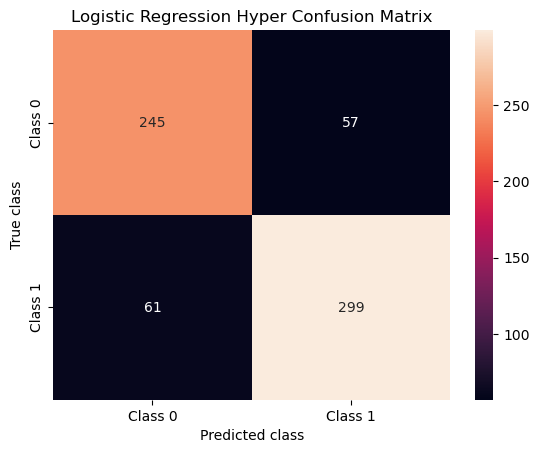

Time: 2.792412516934214e+18


In [45]:
logisticRegression(x_t, x_v, y_t, y_v, True)

Para este modelo en concreto comprobamos que la matriz de confusión utilizando los mejores parámetros posibles, no tiene una gran efectividad.

MODEL  SVC Hyper
SVC Hyper Mejores Parámetros : {'C': 1, 'degree': 3, 'kernel': 'rbf'}
SVC Hyper Puntuje sobre el train: 1.0
SVC Hyper Puntuje sobre el test: 0.9984894259818731
SVC Hyper Métrica de predicción: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       302
           1       1.00      1.00      1.00       360

    accuracy                           1.00       662
   macro avg       1.00      1.00      1.00       662
weighted avg       1.00      1.00      1.00       662

Cross-validation scores: [1. 1. 1. 1. 1. 1.]
Mean: 1.0


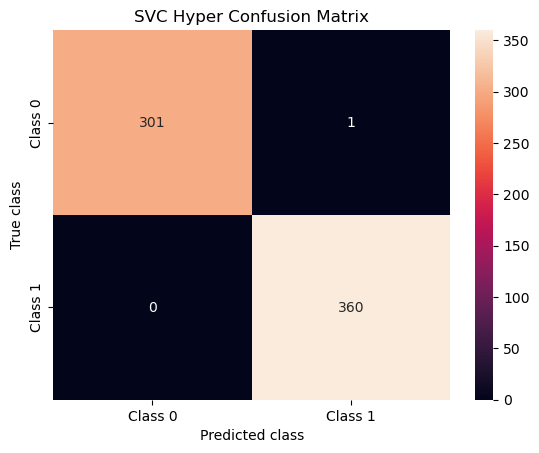

Time: 2.792412656778493e+18


In [46]:
svc(x_t, x_v, y_t, y_v, True)

MODEL  KNN Hyper 
KNN Hyper  Mejores Parámetros : {'n_neighbors': 2, 'p': 2, 'weights': 'uniform'}
KNN Hyper  Puntuje sobre el train: 0.9993514915693904
KNN Hyper  Puntuje sobre el test: 0.9909365558912386
KNN Hyper  Métrica de predicción: 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       302
           1       0.99      0.99      0.99       360

    accuracy                           0.99       662
   macro avg       0.99      0.99      0.99       662
weighted avg       0.99      0.99      0.99       662

Cross-validation scores: [0.98832685 0.99610895 0.98054475 0.9844358  0.9922179  0.9922179 ]
Mean: 0.9889753566796369


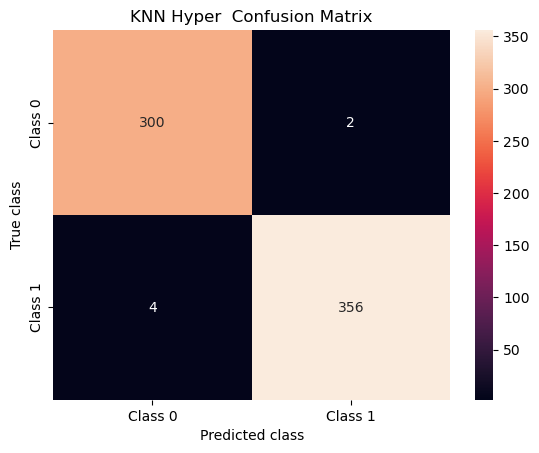

Time: 2.7924127964445307e+18


In [47]:
knn(x_t, x_v, y_t, y_v, True)

MODEL  Random Forest Classifier
Random Forest Classifier Mejores Parámetros : {'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 100}
Random Forest Classifier Puntuje sobre el train: 1.0
Random Forest Classifier Puntuje sobre el test: 1.0
Random Forest Classifier Métrica de predicción: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       302
           1       1.00      1.00      1.00       360

    accuracy                           1.00       662
   macro avg       1.00      1.00      1.00       662
weighted avg       1.00      1.00      1.00       662

Cross-validation scores: [1. 1. 1. 1. 1. 1.]
Mean: 1.0


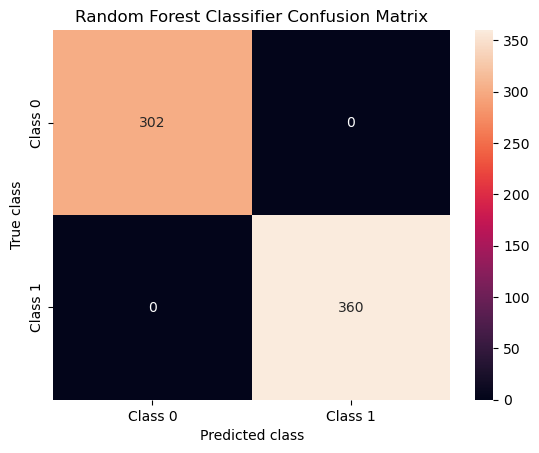

Time: 2.7924130735027364e+18


In [48]:
rfc(x_t, x_v, y_t, y_v, True)

Los dos mejores modelos que se han conseguido ha sido el SVC y el RandomForestClassifier con un F1-score de 1.0. Esto quiere decir que nuestros datos para predecir el jugador son muy buenas. Estos modelos utilizando los mejores hiperparámetros, pero también comprobamos que utilizando modelos básicos y sin ajustar los datos también obtenemos un buen puntaje respeto a utilizar los hiperparámetros. Eso quiere decir que nuestros datos están bien ajustados.

#### ROC CURVE

Después de utilizar el GridSeach para buscar los mejores hiperparámetros para cada modelo. Mostraremos una gráfica ROC-CURVE sobre cada modelo utilizando los hiperparámetros. Y así tener una vista más global sobre estos. La gráfica ROC-CURVE nos permite ver una relación entre los falsos positivos y verdaderos positivos.

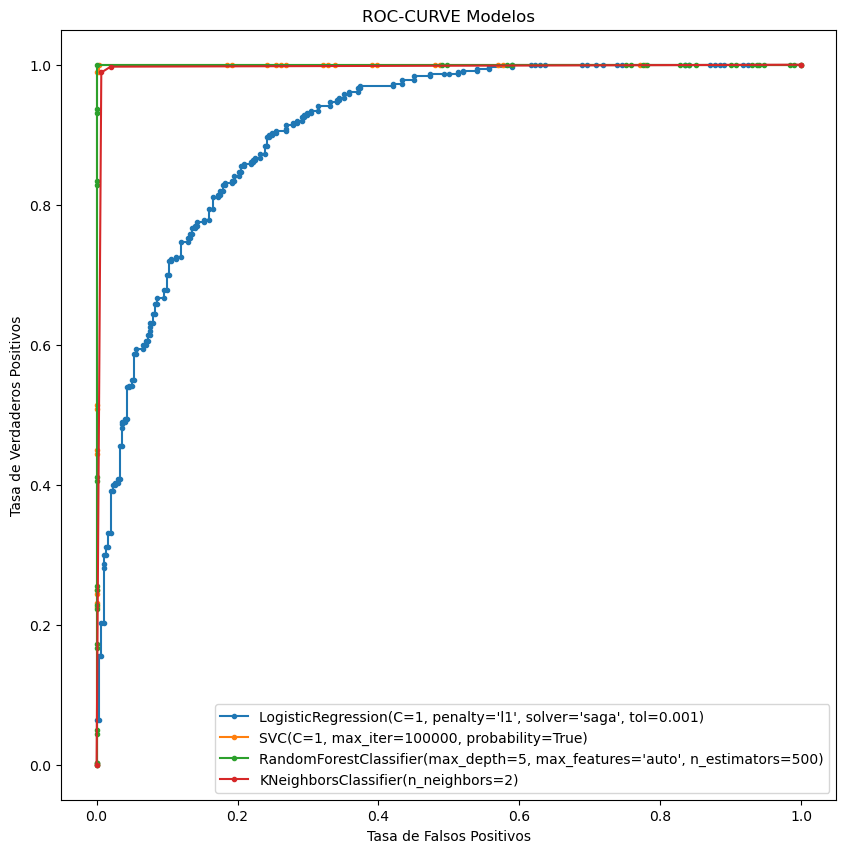

In [49]:
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as pyplot

X_train, X_test, y_train, y_test = train_test_split(X_standarize, y, train_size=0.7, random_state=40)
lr=LogisticRegression(C= 1, penalty= 'l1', solver= 'saga', fit_intercept=True, tol=0.001)
svm=SVC(probability=True, max_iter = 100000, C= 1, degree= 3, kernel='rbf')
rf=RandomForestClassifier(criterion= 'gini', max_depth= 5, max_features= 'auto', n_estimators=500)
knn=KNeighborsClassifier(n_neighbors= 2, p= 2, weights= 'uniform')

models=[lr,svm,rf,knn]
plt.figure(figsize=(10, 10))
for model in models:
    model.fit(X_train,y_train)
    lr_probs  = model.predict_proba(X_test)
    lr_probs = lr_probs[:, 1]
    lr_auc = roc_auc_score(y_test, lr_probs)
    lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
    # Pintamos las curvas ROC
    plt.plot(lr_fpr, lr_tpr, marker='.', label=model)
    # Etiquetas de los ejes
    plt.xlabel('Tasa de Falsos Positivos')
    plt.ylabel('Tasa de Verdaderos Positivos')
    plt.title("ROC-CURVE Modelos")
pyplot.legend()
pyplot.savefig("../figures/ROC-Curve.png")
pyplot.show()


Sobre esta gráfica nos que podemos sacar en conclusión es que el modelo LogisticRegression no tiene una buena relación entre los falsos positivos y los verdaderos positivos, pero no es mala. Pero los otros modelos, el SVC, el RandomForestClassifier y el KNN obtenemos una clasificación perfecta. Y serían los mejores modelos a utilizar sobre nuestros datos.

### Conclusiones

Las conclusiones que sacamos sobre los datos, y después de probar diferentes modelos de clasificación, podemos concluir qué.

Se puede decir que estos dos jugadores, Lebron y Jordan, se les puede diferenciar por las estadísticas que obtenemos de NBA. Esto quiere decir que son jugadores excepcionales, ya que con tan pocos datos sobre ellos. Podemos llegar a tener una buena predicción.

También cabe destacar que haciendo diferentes pruebas sobre la base de datos separadas y prediciendo otros atributos relevantes como puede ser el equipo o el resultado. No obtenemos estos resultados mostrados anteriormente. Para ello se han juntado estos datos y se ha predicho el jugador en cuestión. También me ha parecido más relevante predecir el jugador dependiendo de las estadísticas de cada uno.

Los datos que hemos obtenido los intervalos no eran muy dispersos y eso ha hecho, como se ha visto, que sin normalizar o estandarizar estos datos, se han obtenido un resultado aceptable. Pero estandarizando estos datos y buscando los mejores hiperparámetros de cada modelo, hemos obtenido que nuestro mejor modelo clasificador, sea el SVC con el kernel rbf y el modelo RandomForestClassifier.

También, por otro lado, vemos, que con el modelo Logistic Regression y KNN vemos que utilizando su modelo básico obtenemos una mejor puntuación que normalizando sus datos, pero no estandarizando estos mismos.